# Modellvergleich basierend auf dem $F_1$-Score
Dieses Notebook lädt die Metrikdaten aus einer CSV-Datei und visualisiert die F1-Scores der Testdaten als Balkendiagramm.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [69]:
# CSV-Datei einlesen (angepasst auf Semikolon als Trennzeichen)
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/ML_Metrics_scores.csv", sep=";") #change to semicolon if needed
df.head()
score = "F1_Training"  # Der Score, der für die Visualisierung verwendet wird

In [70]:
df

,Model,Abbreviations,F1_Training,F1_Validation,F1_Testing,Recall_Validation,Recall_Testing,Precision_Validation,Precision_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,Transformer,Transformer,0.842722,0.822985,0.792131,0.826260,0.779401,0.819737,0.805283,0.916061,0.900533,0.875865
1,Gated Transformer Network,GTN,0.840195,0.828194,0.787686,0.872679,0.813002,0.788024,0.763898,0.915860,0.902716,0.860134
2,Temporal Fusion Transformer,TFT,0.826010,0.804984,0.789858,0.856764,0.830533,0.759107,0.752980,0.898421,0.889227,0.868479
3,Multilayer Perceptron,MLP,0.854728,0.817301,0.773324,0.839523,0.775018,0.796226,0.771636,0.930467,0.886864,0.856658
4,Long Short-term Memory,LSTM,0.843391,0.825537,0.775874,0.866048,0.794010,0.788647,0.758548,0.910365,0.891072,0.853859
5,Gated Recurrent Unit,GRU,0.827320,0.819277,0.776912,0.856764,0.801315,0.784933,0.753952,0.902882,0.888269,0.846301
6,Convolutional Neural Network,CNN,0.828174,0.801762,0.769877,0.844828,0.802776,0.762874,0.739569,0.905157,0.867831,0.837575
7,Random Forest,RF,0.983254,0.764238,0.722791,0.765252,0.696129,0.763228,0.751577,0.999001,0.854303,0.809714


In [71]:
f1_df = df[["Abbreviations", score, "F1_Testing"]].copy()
f1_df = f1_df.sort_values(by='F1_Testing', ascending=True)  # 🔁 aufsteigend sortieren
f1_df

,Abbreviations,F1_Training,F1_Testing
7,RF,0.983254,0.722791
6,CNN,0.828174,0.769877
3,MLP,0.854728,0.773324
4,LSTM,0.843391,0.775874
5,GRU,0.827320,0.776912
1,GTN,0.840195,0.787686
2,TFT,0.826010,0.789858
0,Transformer,0.842722,0.792131


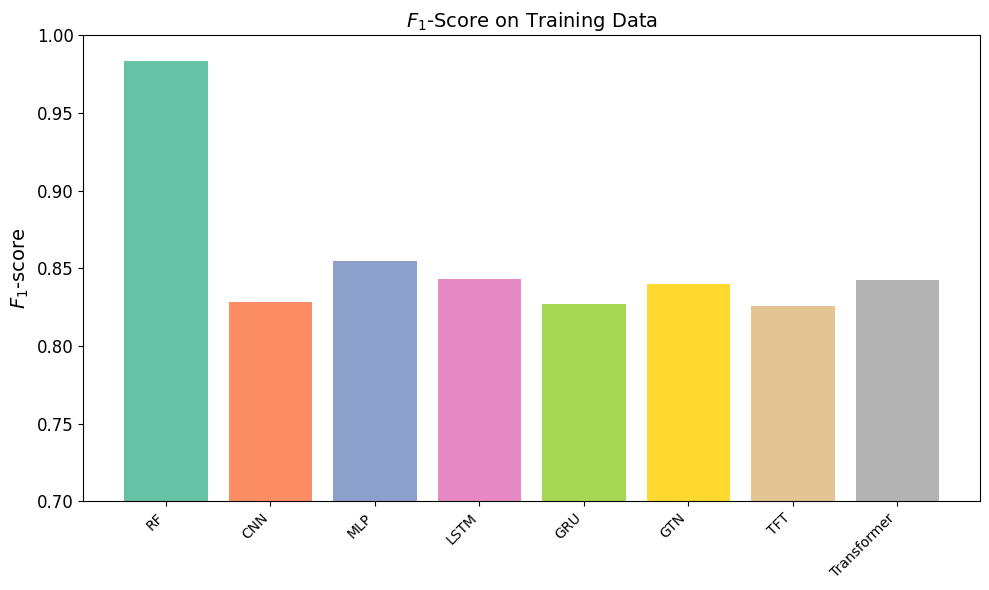

In [73]:
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_df["Abbreviations"], f1_df[score], color=plt.cm.Set2.colors) #plt.cm.Pastel1.colors

plt.ylabel("$F_1$-score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.7, 1.00) #adapt the y-axis limits as needed
plt.title("$F_1$-Score on Training Data", fontsize=14)
plt.tight_layout()
plt.show()


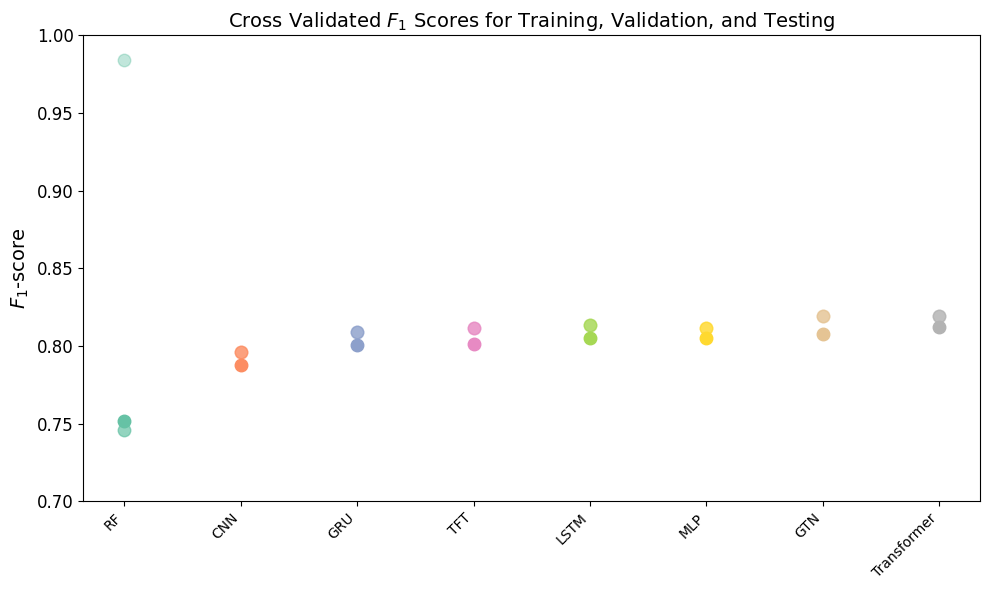

In [51]:
def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing', ascending=True).reset_index(drop=True)
    base_colors = plt.cm.Set2.colors  #plt.cm.Pastel1.colors
    n_models = len(df)
    base_colors = base_colors[:n_models]

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training"], row["F1_Validation"], row["F1_Testing"]]
        color = base_colors[i]

        # Punkte für Training, Validation, Testing mit abgestufter Transparenz
        ax.plot(x, scores[0], 'o', color=color, alpha=0.4, markersize=9, label="_nolegend_")  # Training
        ax.plot(x, scores[1], 'o', color=color, alpha=0.7, markersize=9, label="_nolegend_")  # Validation
        ax.plot(x, scores[2], 'o', color=color, alpha=1.0, markersize=9, label="_nolegend_")  # Testing

    ax.set_xticks(np.arange(n_models))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=10)
    ax.set_ylabel("$F_1$-score", fontsize=14)
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross Validated $F_1$ Scores for Training, Validation, and Testing", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()

# Anwendung
plot_f1_score_points(df)